In [1]:
import healpy as h
import sys  ; sys.path.append("../../codes/")
from modules import local_eb_kernel_masked as rk
from scipy.integrate import quad
import timeit
from scipy.interpolate import interp1d

%pylab notebook
import time

Populating the interactive namespace from numpy and matplotlib


In [2]:
nside=32 ; ell=arange(3*nside+1) ; npix=h.nside2npix(nside) ; print npix
beta0=min(180,180*24./(3.*nside)) ; xsize=400 ; reso=1.5*beta0*60./xsize ; print beta0
betafull=beta0
y=rk.real_space_queb_kernels(nside,tmax=betafull,maxlmax=3*nside,sampling=2500)

12288
45.0


In [3]:
lmin=2 ; lmax=3*nside
fl=ones(3*nside+1,float)
fl[:lmin]=0 ; fl[lmax+1:]=0

y.calc_qu2eb_rad_kernel(lmax,lmin)
y.calc_qu2queb_rad_kernel(lmin,lmin)
y.setup_fn_rad_ker()

In [4]:
cmr=zeros(npix,float)  ; cmi=zeros(npix,float) 
for i in arange(npix):
    tqu=[zeros(npix,float),zeros(npix,float),zeros(npix,float)] ; tqu[1][i]=1.
    alm=h.map2alm(tqu,lmax=lmax,pol=True)
    tebq=h.alm2map(alm,nside,pol=False,verbose=False)
    cmr[i]=-tebq[1][i]
    cmi[i]=-tebq[2][i]  

In [13]:
cltemp=h.read_cl("../../data/cl_rem3.fits")
clrp1=[cltemp[0],cltemp[1],cltemp[2]*10.,cltemp[3]*0] # Reverse E and B spectra

random.seed(0) ; tqu=h.synfast(clrp1,nside,lmax=lmax,pol=True,new=True,verbose=False)


<IPython.core.display.Javascript object>


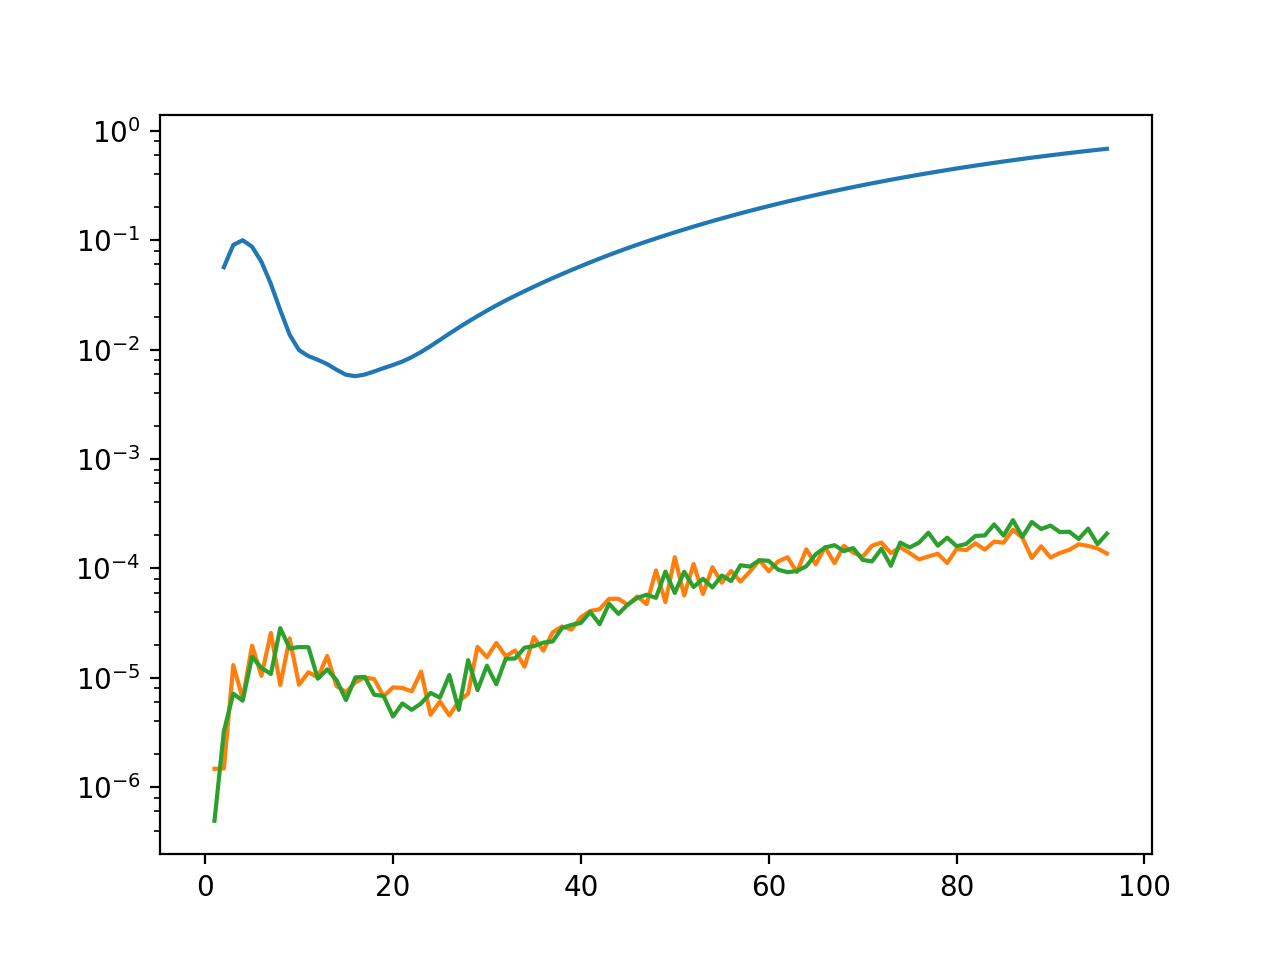

[]

In [22]:
d=[zeros(npix), cmr*tqu[1] - cmi*tqu[2],cmi*tqu[1] + cmr*tqu[2] ]
cld=h.alm2cl(h.map2alm(d,lmax=3*nside,pol=False))

fll=ell*(ell+1.)/(2.*pi)
figure()
plot(ell,fll*clrp1[1][:3*nside+1])


plot(ell,fll*cld[1])
plot(ell,fll*cld[2])
semilogy()